# Sales Analysis of Walmart Dataset  
### Analyzing Walmart sales trends using Python  

#### Project Overview  
This project aims to analyze Walmart sales data to extract meaningful business insights.  
We will explore:  
- Top-selling products & categories  
- Monthly & yearly sales trends  
- Region-wise sales performance
- Customer behavior and payment preferences
- Profitability analysis  

**Tools Used:** Pandas, Matplotlib, Seaborn

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("WalmartSalesData.csv")

# Display first 5 rows
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


## Data Cleaning & Initial Exploration  
Before performing analysis, we need to check for missing values, duplicate records, and data types.  
This step ensures that our dataset is clean and ready for further analysis.  


In [14]:
# Check Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [15]:
# Checking for missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [16]:
# Checking for duplicate rows
df.duplicated().sum()

np.int64(0)

##  Exploratory Data Analysis (EDA)  
Before performing analysis, we need to explore the dataset to identify trends.  
We will analyze:  
- Distribution of total sales  
- Profit distribution  
- Top-selling product categories  
- Branch-wise and region-wise sales comparison  



In [17]:
# Summary statistics of numerical columns
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


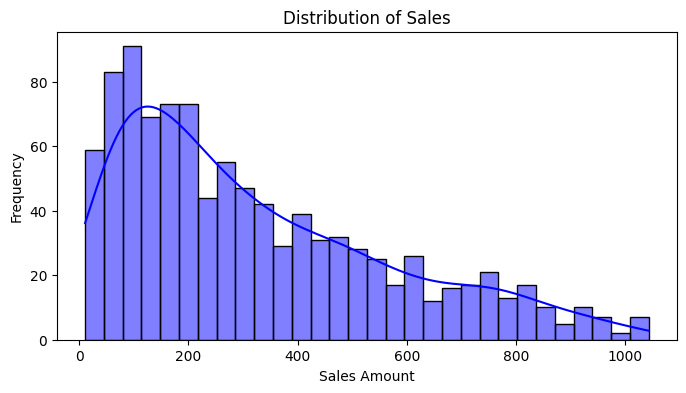

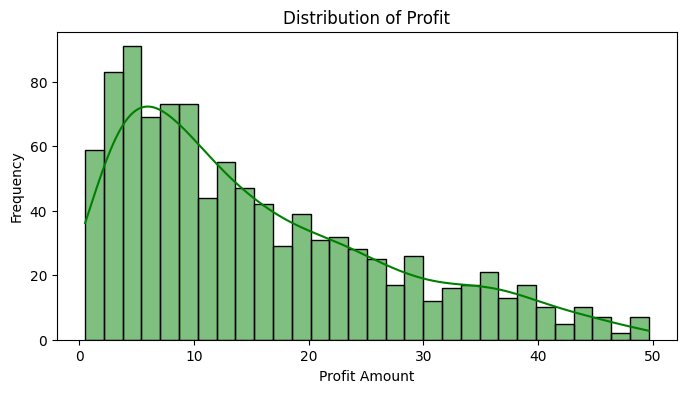

In [18]:
# Sales Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Total'], bins=30, kde=True, color='blue')
plt.title("Distribution of Sales")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

# Profit Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['gross income'], bins=30, kde=True, color='green')
plt.title("Distribution of Profit")
plt.xlabel("Profit Amount")
plt.ylabel("Frequency")
plt.show()


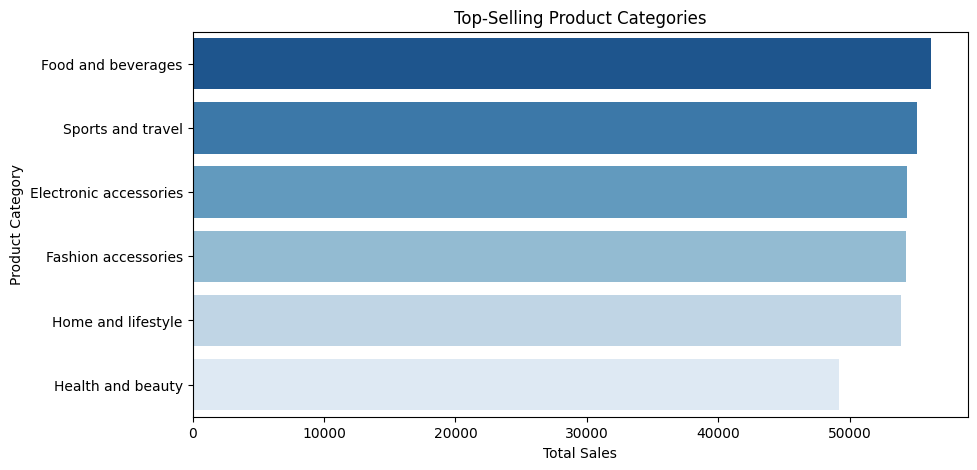

In [19]:
# Top 10 Best Selling Product Categories
top_categories = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='Blues_r')
plt.title("Top-Selling Product Categories")
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.show()


## Branch-wise & Time-wise Sales Analysis  
In this step, we will analyze:  
- Which branch generates the highest revenue?  
- Which time of the day has the highest sales?  
- Sales trend across different days of the week.  


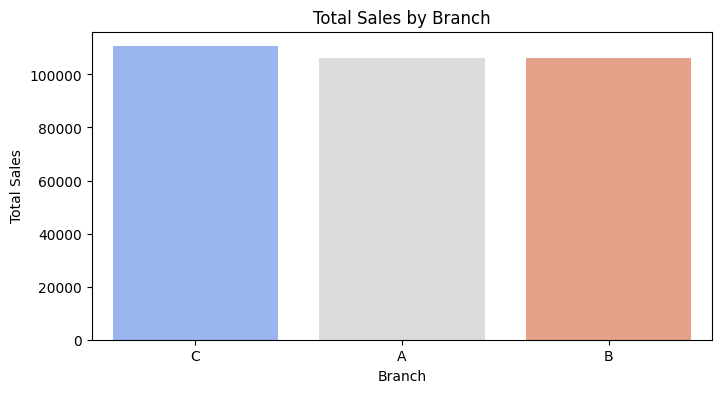

In [20]:
# Branch-wise total sales
branch_sales = df.groupby('Branch')['Total'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,4))
sns.barplot(x=branch_sales.index, y=branch_sales.values, palette='coolwarm')
plt.title("Total Sales by Branch")
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.show()


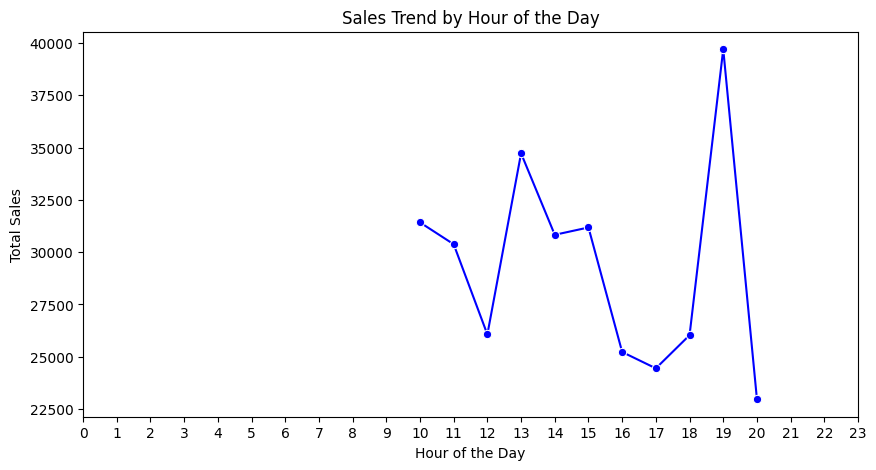

In [21]:
# Converting 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Extracting hour from the 'Time' column
df['Hour'] = df['Time'].dt.hour

# Sales by Hour
hourly_sales = df.groupby('Hour')['Total'].sum()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker="o", color="blue")
plt.title("Sales Trend by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales")
plt.xticks(range(0, 24))
plt.show()


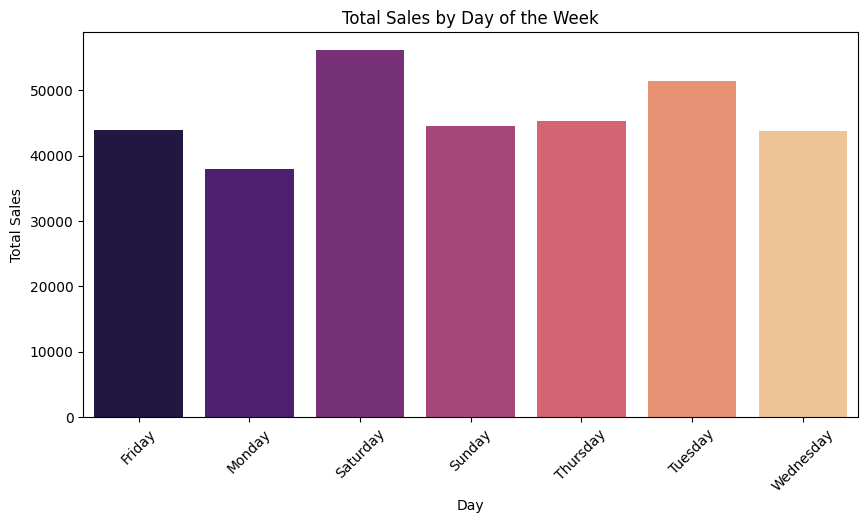

In [22]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extracting Day Name from 'Date'
df['Day'] = df['Date'].dt.day_name()

# Sales by Day
day_sales = df.groupby('Day')['Total'].sum()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=day_sales.index, y=day_sales.values, palette="magma")
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


## Payment Method & Customer Insights Analysis  
In this step, we will analyze:  
- Which payment method is used the most?  
- How do different customer types impact sales?  
- Gender-wise sales comparison.  


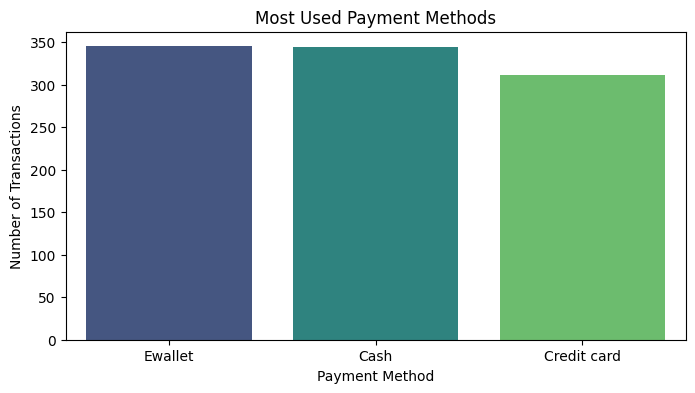

In [23]:
# Payment method distribution
payment_counts = df['Payment'].value_counts()

# Plot
plt.figure(figsize=(8,4))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='viridis')
plt.title("Most Used Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.show()


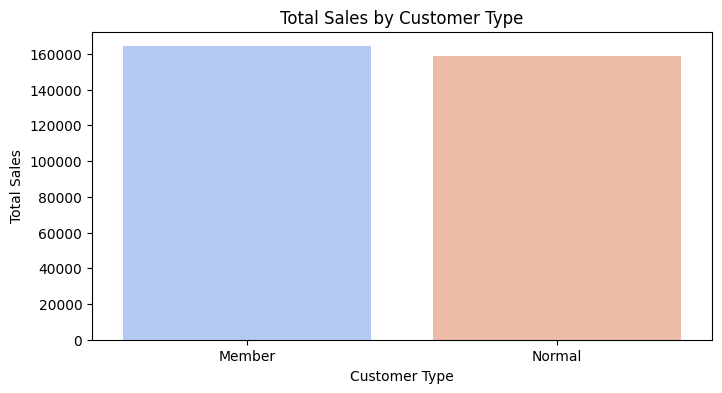

In [24]:
# Sales by Customer Type
customer_sales = df.groupby('Customer type')['Total'].sum()

# Plot
plt.figure(figsize=(8,4))
sns.barplot(x=customer_sales.index, y=customer_sales.values, palette='coolwarm')
plt.title("Total Sales by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")
plt.show()


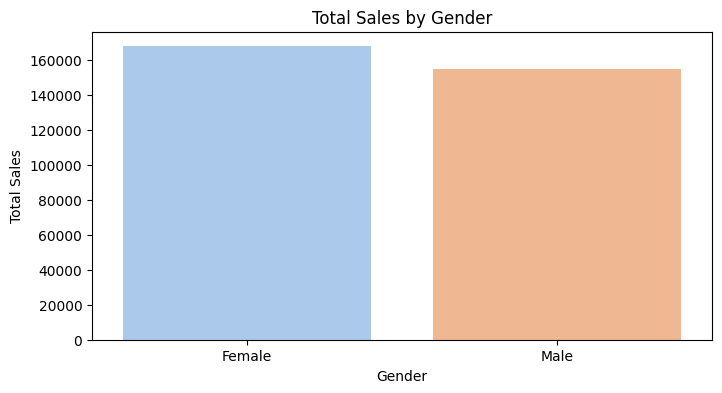

In [25]:
# Sales by Gender
gender_sales = df.groupby('Gender')['Total'].sum()

# Plot
plt.figure(figsize=(8,4))
sns.barplot(x=gender_sales.index, y=gender_sales.values, palette='pastel')
plt.title("Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.show()


## Final Business Insights & Recommendations

Key Findings

Top Branch: (Branch with highest sales from analysis)

Best Selling Product Category: (Most profitable category)

Peak Sales Time: (Time slot with highest transactions)

Best Sales Day: (Which day has highest sales?)

Customer Type Spending Pattern: (Which customer type spends more?)

Most Preferred Payment Method: (Cash/Card/E-Wallet?)

Gender-wise Sales Contribution: (Male or Female, who shops more?)

Business Recommendations

##### Stock More of Best-Selling Products: Increase availability of (best-selling category) to boost sales.
##### Optimize Store Timings: Since most sales occur at (peak time), increase staff availability.
##### Encourage More Memberships: Offer discounts to convert non-members to members. 
##### Payment Optimization: Improve services for (most-used payment method) to enhance the customer experience.
##### Branch-Specific Promotions: Identify successful strategies from (top branch) and apply them to lower-performing stores.